In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

# PyMC Model 1: Conversion Rate
In this examplel, I show how we can rewrite the Bayesian update code that we wrote last week using PyMC3.

In [2]:
data = np.zeros(40)
data[:2] = 1
print(data)

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
with pm.Model() as model_ber:
    theta = pm.Uniform('theta', lower=0, upper=1)
    lp = pm.Bernoulli('lp', p=theta, observed=data)
    trace = pm.sample(5000, chains=2, random_seed=123)

/var/folders/4_/vrr8kzqn5b9dxsprxn13022m0000gn/T/ipykernel_70947/2020373681.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, chains=2, random_seed=123)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 6 seconds.


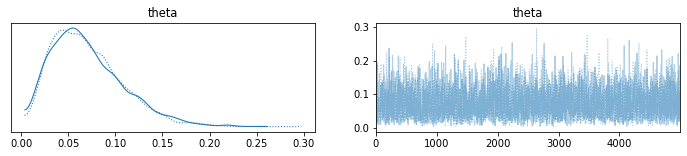

In [4]:
with model_ber:
    az.plot_trace(trace)

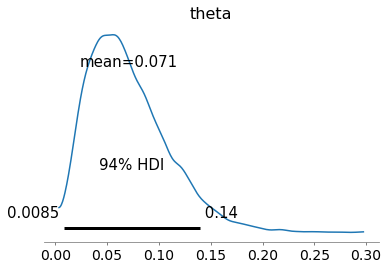

In [5]:
with model_ber:
    az.plot_posterior(trace)

In [6]:
with model_ber:
    summary = az.summary(trace, hdi_prob=0.95)
    print(summary)

        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta  0.071  0.039     0.009      0.145      0.001      0.0    4035.0   

       ess_tail  r_hat  
theta    4567.0    1.0  


# PyMC Model 2: Conversion Rate
In this example, I use the Beta distribution as a prior and the Binomial distribution as likelihood.

In [7]:
N=40
a = 2

with pm.Model() as model_bin:
    theta = pm.Beta('theta', alpha=1, beta=1)
    lp = pm.Binomial('lp', p=theta, n=N, observed=a)
    trace = pm.sample(5000, chains=2, random_seed=123)

/var/folders/4_/vrr8kzqn5b9dxsprxn13022m0000gn/T/ipykernel_70947/2105924073.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, chains=2, random_seed=123)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 4 seconds.


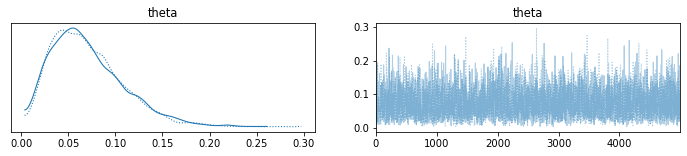

In [8]:
with model_bin:
    az.plot_trace(trace)
    plt.show()

## Comparing Two Designs

In [9]:
with pm.Model() as model_two_designs:
    theta = pm.Beta('theta', alpha=1, beta=1, shape=4)
    lp = pm.Binomial('lp', p=theta, n=[40, 50, 1280, 1600], observed=[2, 4, 64, 128])
    trace = pm.sample(5000, chains=2, random_seed=123)

/var/folders/4_/vrr8kzqn5b9dxsprxn13022m0000gn/T/ipykernel_70947/1653689568.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, chains=2, random_seed=123)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 4 seconds.


           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
theta[0]  0.072  0.040   0.008    0.142        0.0      0.0   11222.0   
theta[1]  0.096  0.040   0.031    0.174        0.0      0.0   14417.0   
theta[2]  0.051  0.006   0.039    0.062        0.0      0.0   12012.0   
theta[3]  0.080  0.007   0.067    0.093        0.0      0.0   13420.0   

          ess_tail  r_hat  
theta[0]    7108.0    1.0  
theta[1]    7148.0    1.0  
theta[2]    7042.0    1.0  
theta[3]    7823.0    1.0  


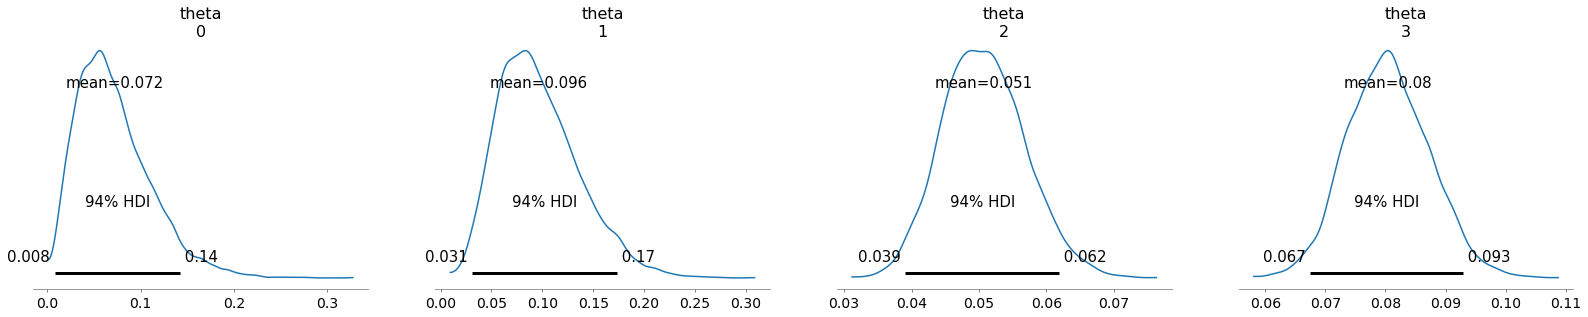

In [10]:
with model_two_designs:
    print(az.summary(trace))
    az.plot_posterior(trace)

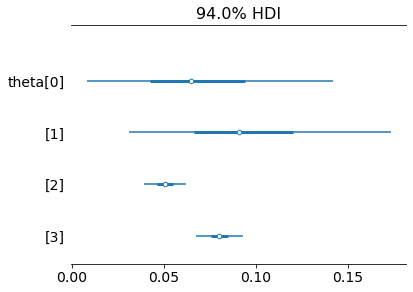

In [11]:
with model_two_designs:
    az.plot_forest(trace, combined=True)

# PyMC Model 3: Product Review
In this example, I use the Dirichlet distribution as a prior and the Categorical distribution as likelihood to model the data generation process of 5-point scale product review.

In [12]:
n_a = [20, 10, 36, 91, 170]
data = [0 for _ in range(n_a[0])]
data += [1 for _ in range(n_a[1])]
data += [2 for _ in range(n_a[2])]
data += [3 for _ in range(n_a[3])]
data += [4 for _ in range(n_a[4])]

In [13]:
with pm.Model() as model_product_a:
    theta = pm.Dirichlet('theta', a=np.array([1., 1., 1., 1., 1.]))
    lp = pm.Categorical('lp', p=theta, observed=data)
    trace_product_a = pm.sample(5000, chains=2)

/var/folders/4_/vrr8kzqn5b9dxsprxn13022m0000gn/T/ipykernel_70947/3572577415.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_product_a = pm.sample(5000, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 9 seconds.


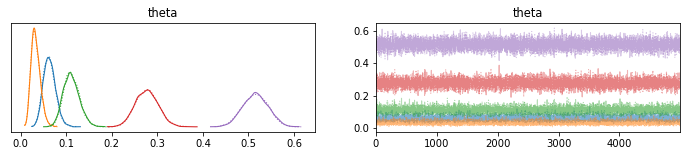

In [14]:
with model_product_a:
    az.plot_trace(trace_product_a)

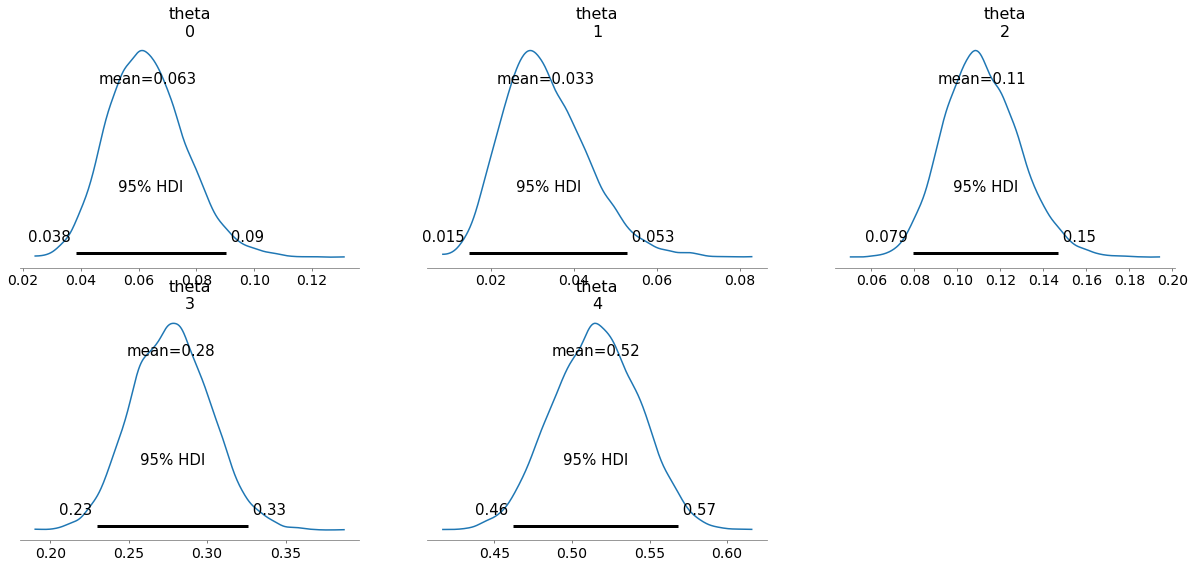

In [15]:
with model_product_a:
    az.plot_posterior(
        trace_product_a,
        hdi_prob=0.95)

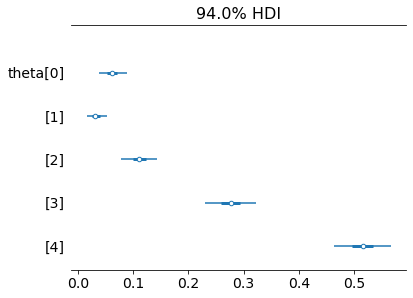

In [16]:
with model_product_a:
    az.plot_forest(
        trace_product_a,
        combined=True)

In [17]:
np.sum(trace_product_a['theta'], axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [18]:
weights = np.array([1, 2, 3, 4, 5])
mean_product_a = [sum(row * weights) for row in trace_product_a['theta']]

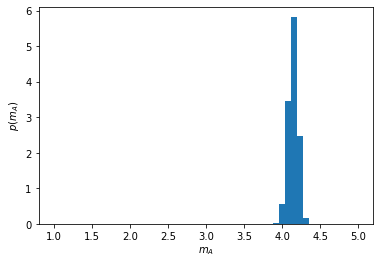

In [19]:
plt.hist(mean_product_a, range=(1, 5), bins=50, density=True)
plt.xlabel(r'$m_A$')
plt.ylabel(r'$p(m_A)$')
plt.show()

## Multinomial distribution

In [20]:
n_b = np.array([0, 0, 4, 0, 6])

with pm.Model() as model_product_b:
    theta = pm.Dirichlet('theta', a=np.array([1., 1., 1., 1., 1.]))
    lp = pm.Multinomial('lp', p=theta, n=n_b.sum(), observed=n_b)
    trace_product_b= pm.sample(5000, chains=2)

/var/folders/4_/vrr8kzqn5b9dxsprxn13022m0000gn/T/ipykernel_70947/2613912305.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_product_b= pm.sample(5000, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kotarohara/repo/Python/web-optimization/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 7 seconds.


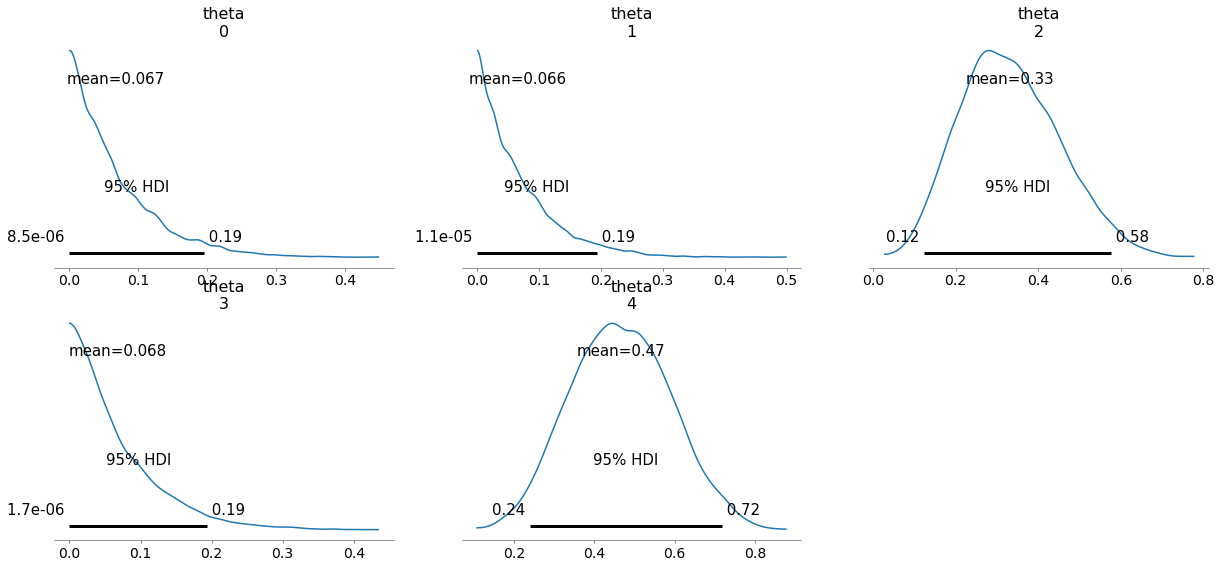

In [21]:
with model_product_b:
    az.plot_posterior(trace_product_b, hdi_prob=0.95)

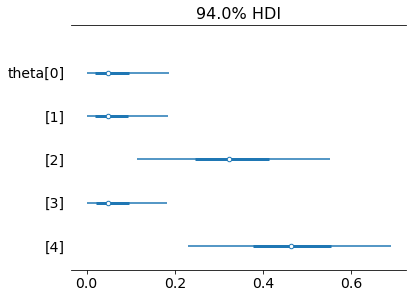

In [22]:
with model_product_b:
    az.plot_forest(trace_product_b, combined=True)

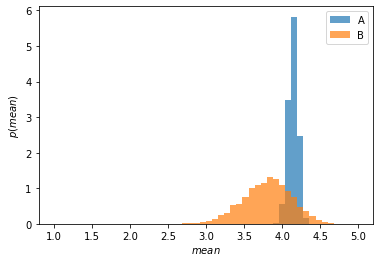

In [23]:
weights = np.array([1, 2, 3, 4, 5])
mean_product_b = [sum(row * weights) for row in trace_product_b['theta']]

plt.hist(mean_product_a, range=(1, 5), bins=50, label="A", density=True, alpha=0.7)
plt.hist(mean_product_b, range=(1, 5), bins=50, label="B", density=True, alpha=0.7)
plt.xlabel(r'$mean$')
plt.ylabel(r'$p(mean)$')
plt.legend()
plt.show()